<a href="https://colab.research.google.com/github/Trading-com-Dados/desenvolvimento_interno/blob/main/Codigo_correlacao_IBOV_Dolar_SP500.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://tradingcomdados.com/images/logotipo/logotipo-trading-com-dados.svg" width="300">

---
# **Explorar a relação entre IBOV, Dólar e S&P 500**
---
#### *Disclaimer:*
#### Este código foi elaborado para fins exclusivamente educacionais. O conteúdo aqui apresentado visa fornecer informações complementares para auxiliar o investidor na tomada de suas próprias decisões de investimento. Reforçando, nenhum tópico aqui abordado constitui qualquer tipo de indicação/oferta/solicitação de compra/venda de qualquer produto.
---

## **Contexto:**<p>
Dentre os muitos mitos no Mercado Financeiro, um deles muitas vezes direciona muitos investidores brasileiros: a potencial relação entre o IBOV, o Dólar e o S&P 500 (uma das fortes bolsas norte-americanas).<p>
Se perguntar à maioria dos investidores, espera-se uma forte relação negativa entre IBOV e Dólar, enquanto que uma forte relação positiva entre IBOV e S&P 500.<p>
Por um lado, essas relações fazem muito sentido por diversos motivos, dentre eles:
1. Boa parte do capital estrangeiro que entra no Brasil vem na forma de dólar. Assim, os investidores estrangeiros compram real, aumentando a demanda por nossa moeda, o que consequentemente reduz a razão entre USD / BRL.
2. A compra de dólar é globalmente associada à "segurança" em períodos de crise ou instabilidade. Assim, muitos investidores vendem suas ações (reduzindo o IBOV) e compram dólar
3. O S&P 500 é uma das bolsas mais fortes de todo o mundo. Para muitos investidores, ela é um termômetro da economia. Se ela vai bem, pode ser um bom sinalizador de que no geral, a economia global está aquecida, aumentando os aportes também em outros países.

## 1. Bibliotecas

In [1]:
!pip install yfinance

     |████████████████████████████████| 6.4 MB 4.9 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [99]:
import yfinance as yf
import pandas as pd
import plotly.express as px

## 2. Obtenção de dados

In [33]:
# USD/BRL, IBOV e S&P 500 na yfinance

ativos = ['BRL=X','^BVSP','^GSPC']

In [37]:
# cotações diárias

cotacoes_1D = yf.download(ativos,start='2015-01-01',period='1d')['Adj Close']

[*********************100%***********************]  3 of 3 completed


In [38]:
cotacoes_1D

,BRL=X,^BVSP,^GSPC
Date,,,
2015-01-01,2.654200,NaN,NaN
2015-01-02,2.653200,48512.00000,2058.199951
2015-01-05,2.691200,47517.00000,2020.579956
2015-01-06,2.703100,48001.00000,2002.609985
2015-01-07,2.696600,49463.00000,2025.900024
...,...,...,...
2022-03-14,5.073500,109928.00000,4173.109863
2022-03-15,5.121400,108959.00000,4262.450195
2022-03-16,5.163200,111112.00000,4357.859863


In [53]:
# Renomear as colunas para facilitar

cotacoes_1D = cotacoes_1D.rename({'BRL=X':'USD_BRL', '^BVSP':'IBOV', '^GSPC':'S&P_500'}, axis=1)
cotacoes_1D

,USD_BRL,IBOV,S&P_500
Date,,,
2015-01-01,2.654200,NaN,NaN
2015-01-02,2.653200,48512.00000,2058.199951
2015-01-05,2.691200,47517.00000,2020.579956
2015-01-06,2.703100,48001.00000,2002.609985
2015-01-07,2.696600,49463.00000,2025.900024
...,...,...,...
2022-03-14,5.073500,109928.00000,4173.109863
2022-03-15,5.121400,108959.00000,4262.450195
2022-03-16,5.163200,111112.00000,4357.859863


In [46]:
# Saber qts NA ou NaN tem por coluna (no caso, por ativo). O método "sum(0)" avalia por colunas e "sum(1)" por linhas

contagem_NA = cotacoes_1D.isna().sum(0)
contagem_NA

BRL=X     3
^BVSP    99
^GSPC    66
dtype: int64

In [48]:
contagem_NA = cotacoes_1D.isna().sum(1)
contagem_NA

Date
2015-01-01    2
2015-01-02    0
2015-01-05    0
2015-01-06    0
2015-01-07    0
             ..
2022-03-14    0
2022-03-15    0
2022-03-16    0
2022-03-17    0
2022-03-18    0
Freq: B, Length: 1882, dtype: int64

In [51]:
# Saber qts e quais linhas contem pelo menos 1 NA. Note que são usualmente feriados aqui no Brasil e nos EUA

cotacoes_1D[(cotacoes_1D.isna().sum(1)/cotacoes_1D.shape[1])>0.1]

,BRL=X,^BVSP,^GSPC
Date,,,
2015-01-01,2.6542,NaN,NaN
2015-01-19,2.6169,47758.0,NaN
2015-02-16,2.8309,NaN,NaN
2015-02-17,2.8260,NaN,2100.340088
2015-04-03,3.1222,NaN,NaN
...,...,...,...
2021-12-31,5.5702,NaN,4766.180176
2022-01-17,5.5333,106692.0,NaN
2022-02-21,5.1375,111725.0,NaN


In [54]:
# Retirar qq linha que contenha pelo menos 1 NA (note que das 1882 linhas iniciais sobraram 1737, isto é, 145 a menos)

cotacoes_1D_semNA = cotacoes_1D.dropna()
cotacoes_1D_semNA

,USD_BRL,IBOV,S&P_500
Date,,,
2015-01-02,2.653200,48512.00000,2058.199951
2015-01-05,2.691200,47517.00000,2020.579956
2015-01-06,2.703100,48001.00000,2002.609985
2015-01-07,2.696600,49463.00000,2025.900024
2015-01-08,2.680800,49943.00000,2062.139893
...,...,...,...
2022-03-14,5.073500,109928.00000,4173.109863
2022-03-15,5.121400,108959.00000,4262.450195
2022-03-16,5.163200,111112.00000,4357.859863


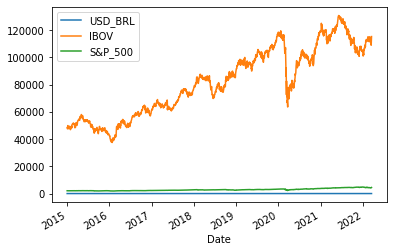

In [84]:
# Fazer um plot com os três ativos. As escalas diferentes inviabilizam qq comparação

cotacoes_1D_semNA.plot()

In [85]:
# Como os valores são mt distintos em escala, é preciso normalizá-los para permitir a comparação

normalizado_1D = cotacoes_1D_semNA/cotacoes_1D_semNA.iloc[0]
normalizado_1D

,USD_BRL,IBOV,S&P_500
Date,,,
2015-01-02,1.000000,1.000000,1.000000
2015-01-05,1.014322,0.979490,0.981722
2015-01-06,1.018807,0.989467,0.972991
2015-01-07,1.016358,1.019603,0.984307
2015-01-08,1.010403,1.029498,1.001914
...,...,...,...
2022-03-14,1.912219,2.265996,2.027553
2022-03-15,1.930273,2.246022,2.070960
2022-03-16,1.946027,2.290402,2.117316


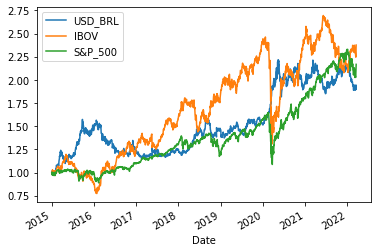

In [89]:
# Com os dados normalizados podemos perceber que IBOV e S&P 500 tendem a estar correlacionados positivamente (quando um aumenta o outro tende a aumentar tb).
# Já com o dolar, o IBOV parece estar correlacionado negativamente (quando um aumenta o outro tende a diminuir) em alguns momentos, mas em outros não

normalizado_1D.plot()

In [92]:
# Vamos deixar só o IBOV e Dolar

Dolar_X_IBOV = normalizado_1D.drop("S&P_500",axis=1)
Dolar_X_IBOV

,USD_BRL,IBOV
Date,,
2015-01-02,1.000000,1.000000
2015-01-05,1.014322,0.979490
2015-01-06,1.018807,0.989467
2015-01-07,1.016358,1.019603
2015-01-08,1.010403,1.029498
...,...,...
2022-03-14,1.912219,2.265996
2022-03-15,1.930273,2.246022
2022-03-16,1.946027,2.290402


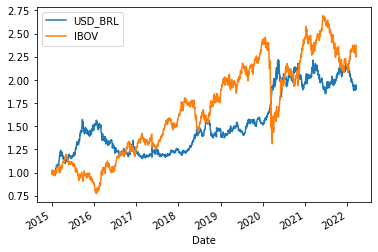

In [103]:
# A correlação negativa em alguns momentos (ex., 2015-2016, na crise COVID) ficou um pouco mais evidente. Por outro lado, alguns momentos mostram uma correlação positiva (fim de 2018 a inicio de 2020).
# De qq forma, qualquer relação definitiva ainda pode ser muito questionável

Dolar_X_IBOV.plot()

In [101]:
# O gráfico de scatterplots é muito bom para avaliar correlações entre duas variáveis. Uma possível correlação positiva (principalmente se considerarmos todo o período, desde 2015) é muito mais evidente.
fig = px.scatter(normalizado_1D, x="USD_BRL", y="IBOV")

fig.show()

In [106]:
# Para tentar retirar (ou pelo menos reduzir) a subjetividade, usamos métricas estatísticas que são adotadas e aceitam globalmente nas mais diversas áreas do conhecimento
# Uma delas é o teste de correlação. No Python (usando a biblioteca pandas) fica assim (vamos voltar a analisar todos os 3 ativos)

cotacoes_1D_semNA.corr()

,USD_BRL,IBOV,S&P_500
USD_BRL,1.000000,0.718893,0.827834
IBOV,0.718893,1.000000,0.890612
S&P_500,0.827834,0.890612,1.000000


In [107]:
cotacoes_1D_semNA.corr(method="spearman")

,USD_BRL,IBOV,S&P_500
USD_BRL,1.000000,0.691779,0.760373
IBOV,0.691779,1.000000,0.956110
S&P_500,0.760373,0.956110,1.000000


In [108]:
# Talvez se ao invés de avaliar a cotação de fechamento em si, analisarmos o resultado (pct_change)??

result_1D = cotacoes_1D_semNA.pct_change()
result_1D

,USD_BRL,IBOV,S&P_500
Date,,,
2015-01-02,NaN,NaN,NaN
2015-01-05,0.014322,-0.020510,-0.018278
2015-01-06,0.004422,0.010186,-0.008893
2015-01-07,-0.002405,0.030458,0.011630
2015-01-08,-0.005859,0.009704,0.017888
...,...,...,...
2022-03-14,0.012735,-0.015978,-0.007421
2022-03-15,0.009441,-0.008815,0.021409
2022-03-16,0.008162,0.019760,0.022384


In [113]:
# Vamos unir as duas tabelas para facilitar visualizações e análises

cotacoes_pct_1D = pd.concat([cotacoes_1D_semNA,result_1D],axis=1)
cotacoes_pct_1D

,USD_BRL,IBOV,S&P_500,USD_BRL,IBOV,S&P_500
Date,,,,,,
2015-01-02,2.653200,48512.00000,2058.199951,NaN,NaN,NaN
2015-01-05,2.691200,47517.00000,2020.579956,0.014322,-0.020510,-0.018278
2015-01-06,2.703100,48001.00000,2002.609985,0.004422,0.010186,-0.008893
2015-01-07,2.696600,49463.00000,2025.900024,-0.002405,0.030458,0.011630
2015-01-08,2.680800,49943.00000,2062.139893,-0.005859,0.009704,0.017888
...,...,...,...,...,...,...
2022-03-14,5.073500,109928.00000,4173.109863,0.012735,-0.015978,-0.007421
2022-03-15,5.121400,108959.00000,4262.450195,0.009441,-0.008815,0.021409
2022-03-16,5.163200,111112.00000,4357.859863,0.008162,0.019760,0.022384


In [109]:
result_1D.corr(method="spearman")

,USD_BRL,IBOV,S&P_500
USD_BRL,1.000000,0.020262,0.017381
IBOV,0.020262,1.000000,0.478760
S&P_500,0.017381,0.478760,1.000000
